# Es 1.1

In questo primo esercizio è stato chiesto di testare il generatore di numeri pseudo-casuali attraverso la stima di due diversi integrali.<br>
$\langle r \rangle = \int_0^1 r dr = 1/2$<br>
$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$<br>
Ogni integrale è valutato più volte con una distribuzione uniforme nel dominio di integrazione.
Per fare questo è stato implementato un algoritmo hit or miss, il quale ha reso possibile sia la valutazione degli integrali con i loro errori, sia $\sigma$. In linea con le aspettative l'errore diminuisce all'aumentare del numero di lanci e i valori, sia dell'integrale, che della $sigma$, si stabilizzano.

Come ulteriore verifica dell'effettivo utilizzo di un RNG, è stato implementato, come richiesto dall'esercitazione, un test $\chi^2$.
Il grafico di dispersione culumata dei vari $\chi^2_i$ mostra che essi si distribuiscono intorno a valore 100, questa come ulteriore verifica del corretto funzionamento del RNG.

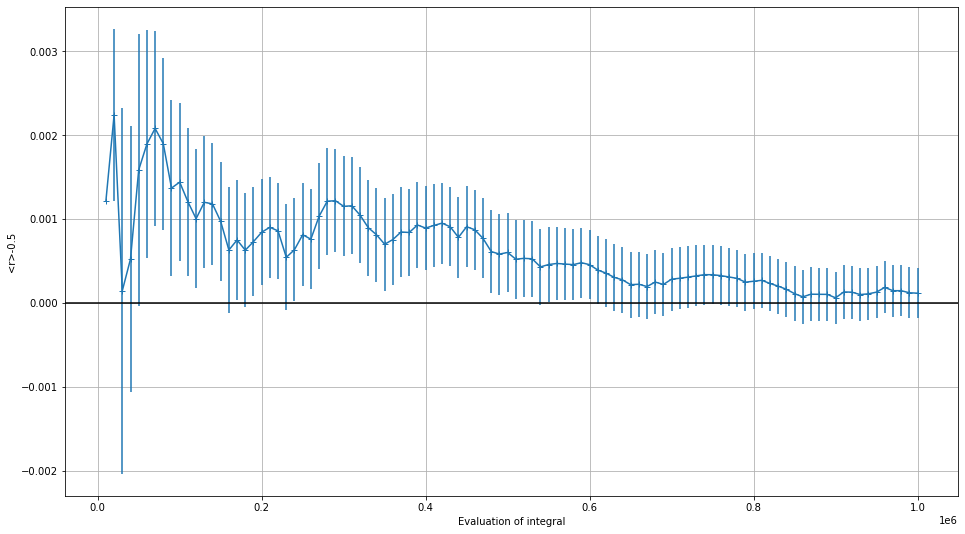

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import pi

x, sum, error = np.loadtxt("res1_1.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.rcParams['figure.figsize'] = [16,9]
plt.errorbar(x,sum,yerr=error, marker="+")
plt.xlabel('Evaluation of integral')

plt.ylabel('<r>-0.5')
plt.grid(True)
plt.axhline(y=0, color='black')
plt.show()

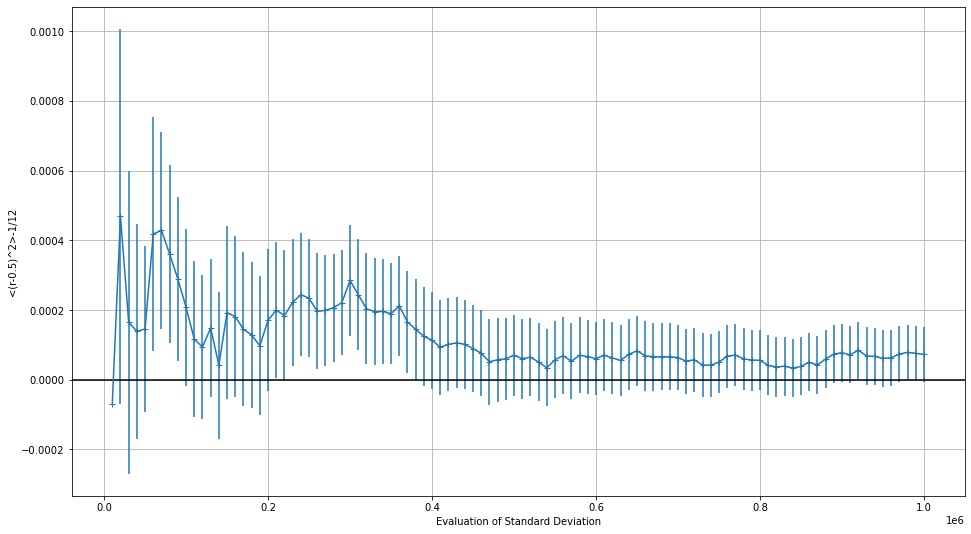

In [2]:
x, sum, error = np.loadtxt("res1_2.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum,yerr=error, marker="+")
plt.xlabel('Evaluation of Standard Deviation')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.axhline(y=0, color='black')
plt.show()

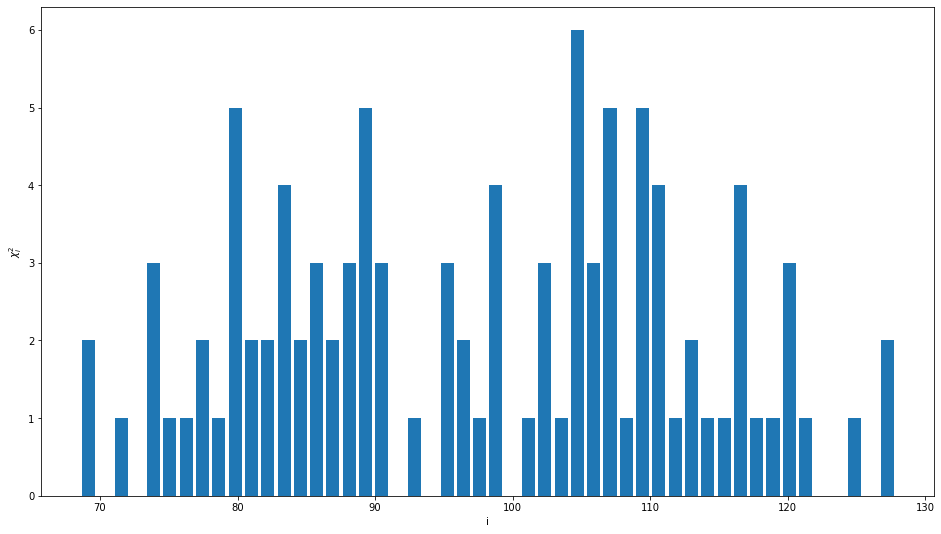

In [3]:
chi = np.loadtxt("res1_3.dat", usecols=(1), delimiter=";", unpack='true')
hist, bins = np.histogram(chi, bins=50 )
width =  0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('i')
plt.ylabel('$\chi^2_i$')

plt.show()

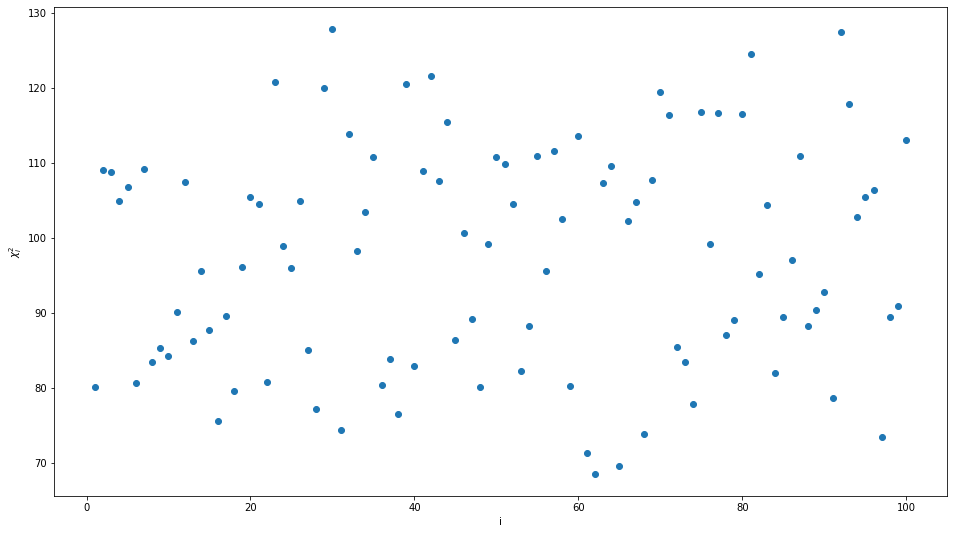

In [4]:
x, chi = np.loadtxt("res1_3.dat", usecols=(0, 1), delimiter=";", unpack='true')
plt.scatter(x,chi)

plt.xlabel('i')
plt.ylabel('$\chi^2_i$')

plt.show()

# Es 2.1

È stata estesa la libreria del generatore casuale per avere una distribuzione esponenziale e una distribuzione Cauchy-Lorentz.
Verifichiamo poi il Teorema del Limite Centrale: si ipotizza che, aumentando il numero di lanci (e di conseguenza il numero di somme), queste tendano a distribuirsi secondo la distribuzione limite (Gauss per i dadi Uniforme ed Esponenziale, Cauchy-Lorentz per l'ultima). 
Come mostrano i grafici qui sotto, i risultati ottenuti sono in linea con le aspettative.

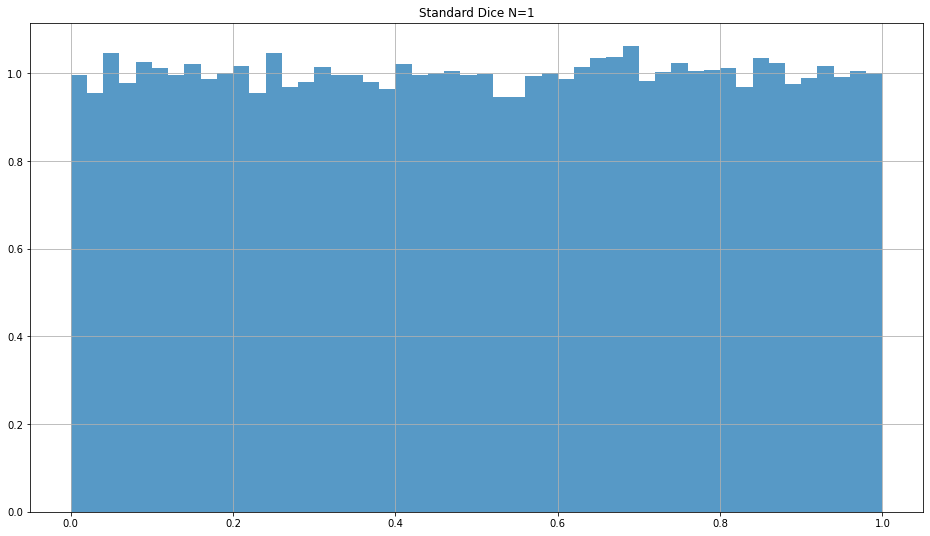

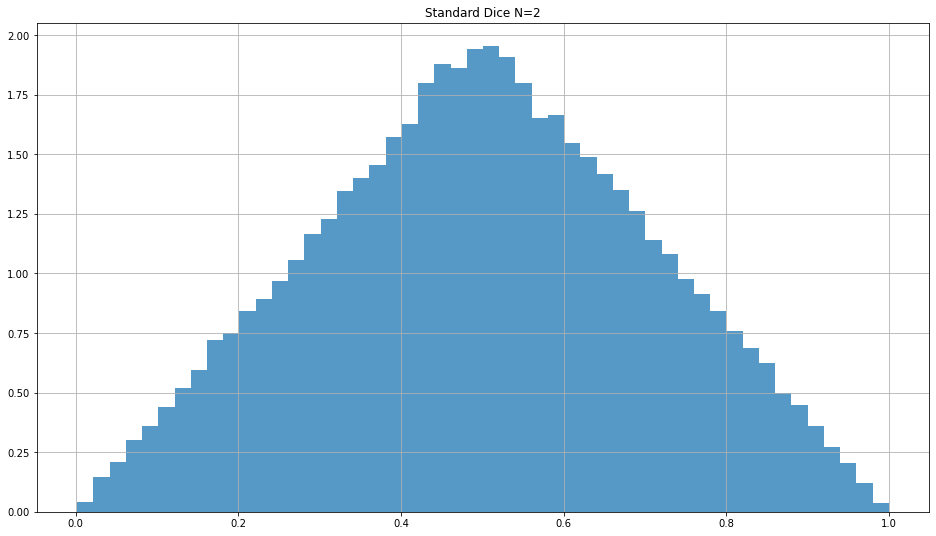

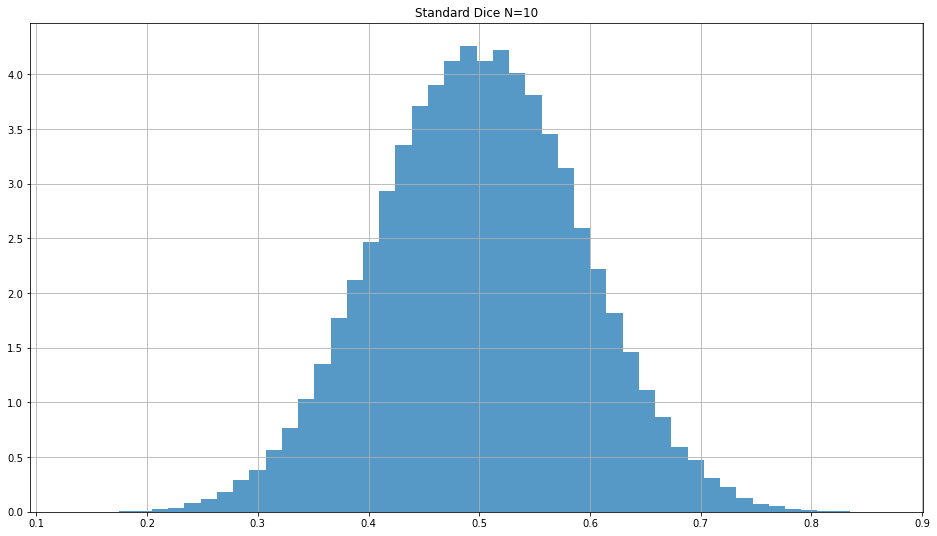

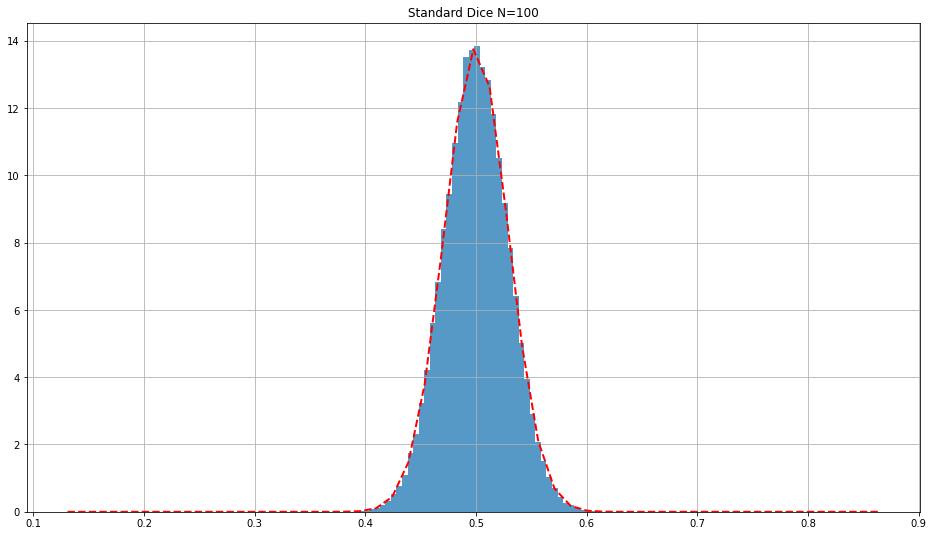

In [5]:
from scipy.stats import norm
from scipy.stats import cauchy
import matplotlib.mlab as mlab

x = np.loadtxt("distr_std_N_1.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Standard Dice N=1')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_std_N_2.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Standard Dice N=2')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_std_N_10.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Standard Dice N=10')
plt.grid(True)

plt.show()


x = np.loadtxt("distr_std_N_100.dat")
(mu, sigma) = norm.fit(x)
plt.plot(bins, norm.pdf( bins, mu, sigma), 'r--', linewidth=2)
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Standard Dice N=100')
plt.grid(True)

plt.show()

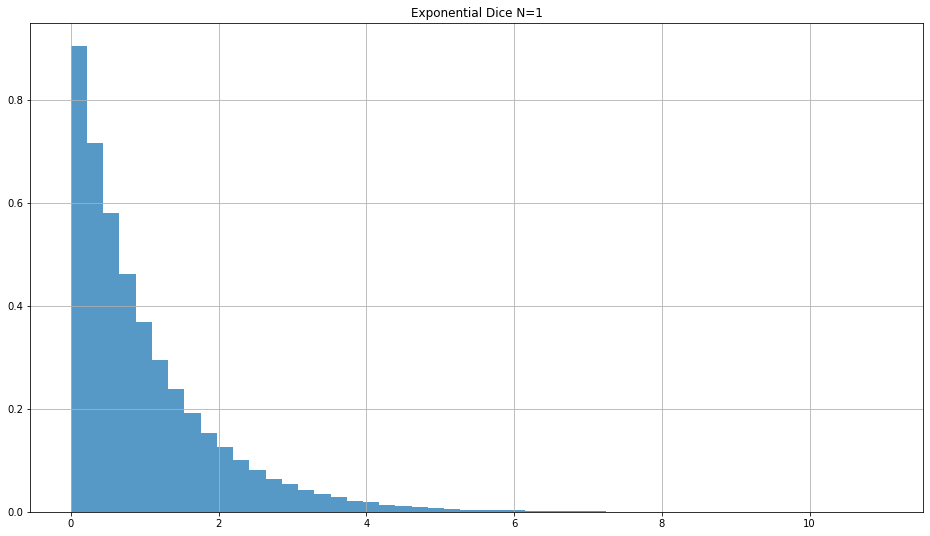

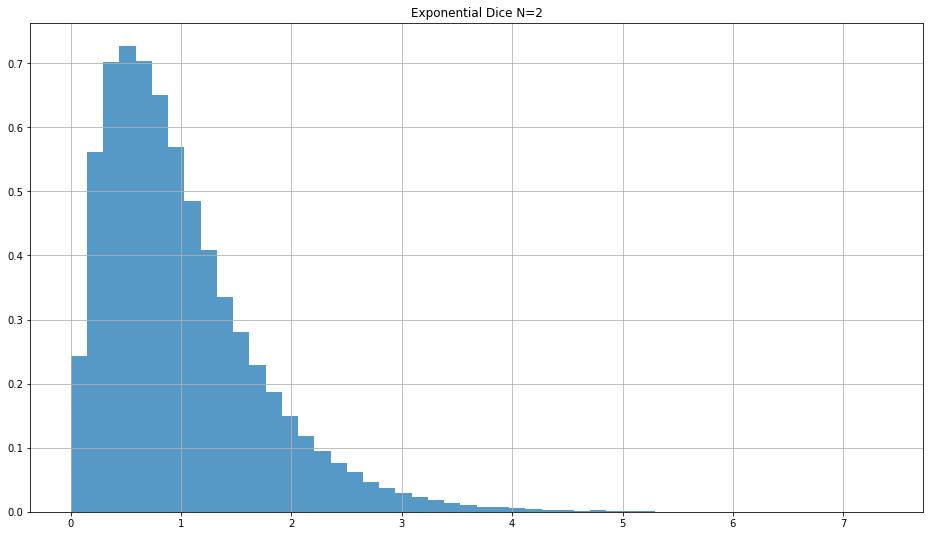

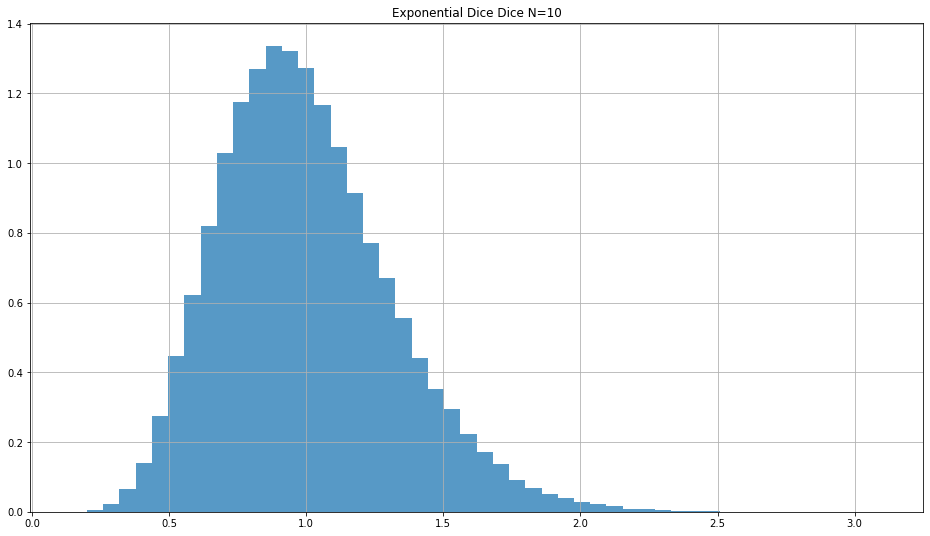

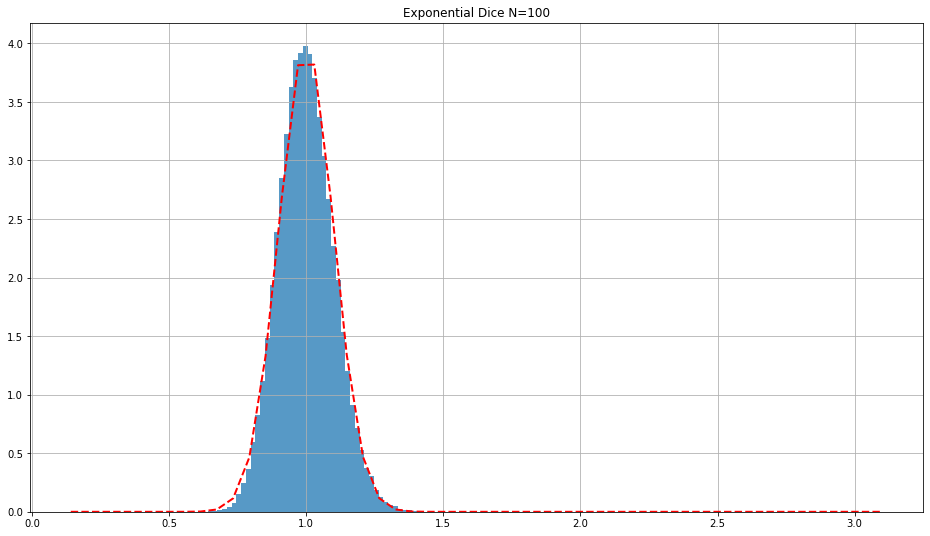

In [6]:
x = np.loadtxt("distr_exp_N_1.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Exponential Dice N=1')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_exp_N_2.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Exponential Dice N=2')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_exp_N_10.dat")
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Exponential Dice Dice N=10')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_exp_N_100.dat")
(mu, sigma) = norm.fit(x)
plt.plot(bins, norm.pdf( bins, mu, sigma), 'r--', linewidth=2)
n, bins, patches = plt.hist(x, 50, density=True, alpha=0.75)
plt.title('Exponential Dice N=100')
plt.grid(True)

plt.show()

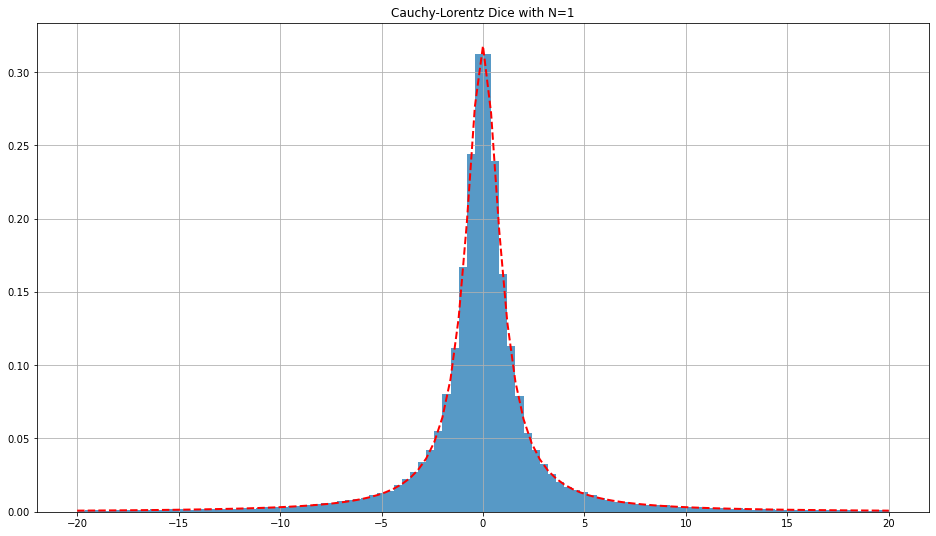

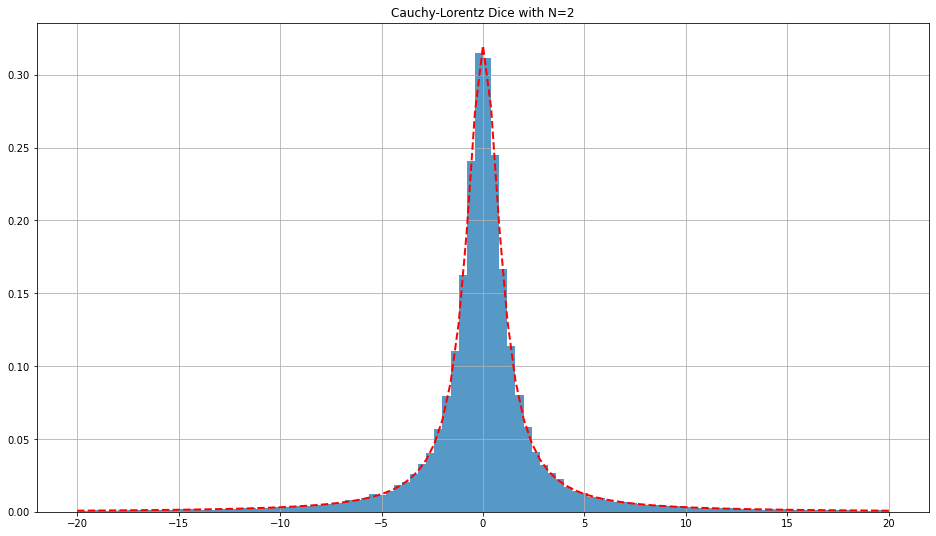

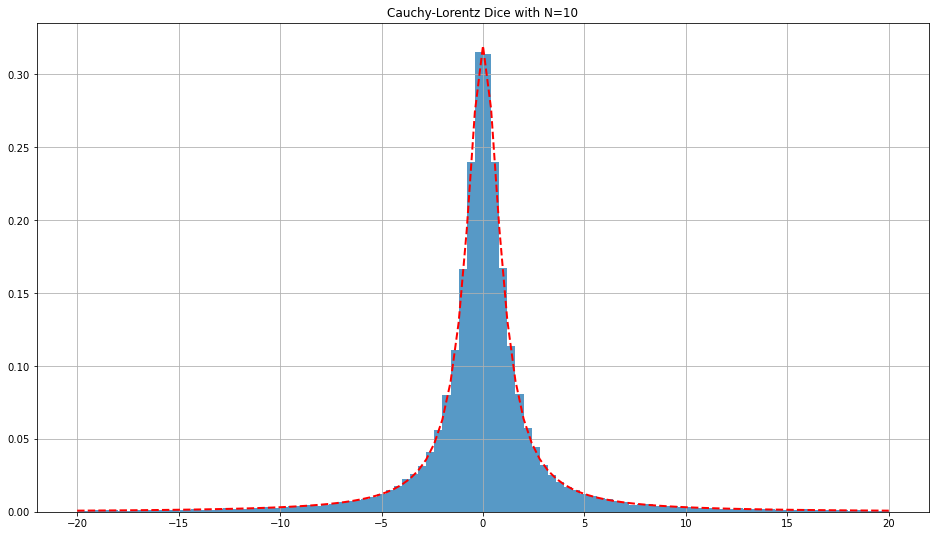

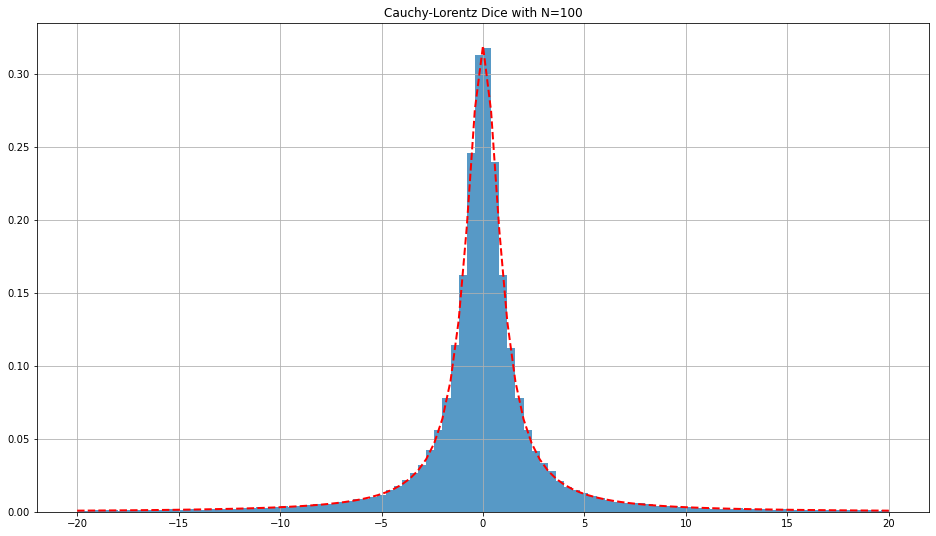

In [7]:
x = np.loadtxt("distr_lor_N_1.dat")
(par1, par2) =cauchy.fit(x)
n, bins, patches = plt.hist(x, 100, range=[-20, 20], density=True, alpha=0.75)
plt.plot(bins, cauchy.pdf(bins, par1, par2), 'r--', linewidth=2)
plt.title('Cauchy-Lorentz Dice with N=1')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_lor_N_2.dat")
(par1, par2) =cauchy.fit(x)
n, bins, patches = plt.hist(x, 100, range=[-20, 20], density=True, alpha=0.75)
plt.plot(bins, cauchy.pdf(bins, par1, par2), 'r--', linewidth=2)
plt.title('Cauchy-Lorentz Dice with N=2')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_lor_N_10.dat")
(par1, par2) =cauchy.fit(x)
n, bins, patches = plt.hist(x, 100, range=[-20, 20], density=True, alpha=0.75)
plt.plot(bins, cauchy.pdf(bins, par1, par2), 'r--', linewidth=2)
plt.title('Cauchy-Lorentz Dice with N=10')
plt.grid(True)

plt.show()

x = np.loadtxt("distr_lor_N_100.dat")
(par1, par2) =cauchy.fit(x)
n, bins, patches = plt.hist(x, 100, range=[-20, 20], density=True, alpha=0.75)
plt.plot(bins, cauchy.pdf(bins, par1, par2), 'r--', linewidth=2)
plt.title('Cauchy-Lorentz Dice with N=100')
plt.grid(True)

plt.show()

# Es 3.1

In questo esercizio è stato implementato l'esperimento dell'ago di Buffon. Cioè è stato simulata la caduta di tanti aghi che su un piano graduato. Per evitare di usare $\pi$ per calcolare $\pi$, non abbiamo potuto usare una distribuzione sinusoidale. Usando $\theta$ definito come l'arcotan del rapporto fra due RNG si ha un problema per $\theta \rightarrow \pi/2$, poiché la tangente va a $\infty$. 
Quindi abbiamo generato dei punti all'interno di una circonferenza e valutato il seno come il rapporto delle coordinate di ogni punto nel frame di riferimento del centro della circonferenza.
Poi per il calcolo del $\pi$. <br>
$\begin{equation}
\pi=\frac{2LN_{throws}}{N_{hits} d}
\end{equation}$


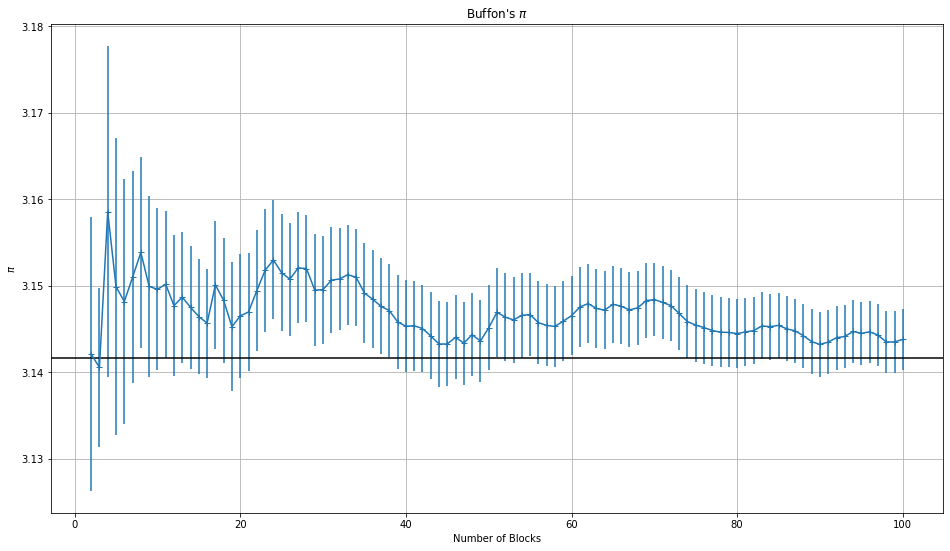

In [26]:
x, sum, error = np.loadtxt("pi.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum,yerr=error,marker="+")
plt.xlabel('Number of Blocks')
plt.ylabel('$\pi$')
plt.title("Buffon's $\pi$")
plt.axhline(y=pi, color='black')
plt.grid()
plt.show()